In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import re

In [106]:
df = pd.read_csv('master.csv')

In [107]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [109]:
df.shape

(31756, 12)

In [110]:
df.columns.tolist()

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [111]:
#cleaning the column name
df.columns = df.columns.str.strip()

In [112]:
df.columns.tolist()

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 'gdp_for_year ($)',
 'gdp_per_capita ($)',
 'generation']

In [113]:
#more than 60% of data is misiing in hdi for year
df = df.drop('HDI for year' , axis = 1)
df = df.dropna()

In [114]:
#visualising suicide numbers with years and various features

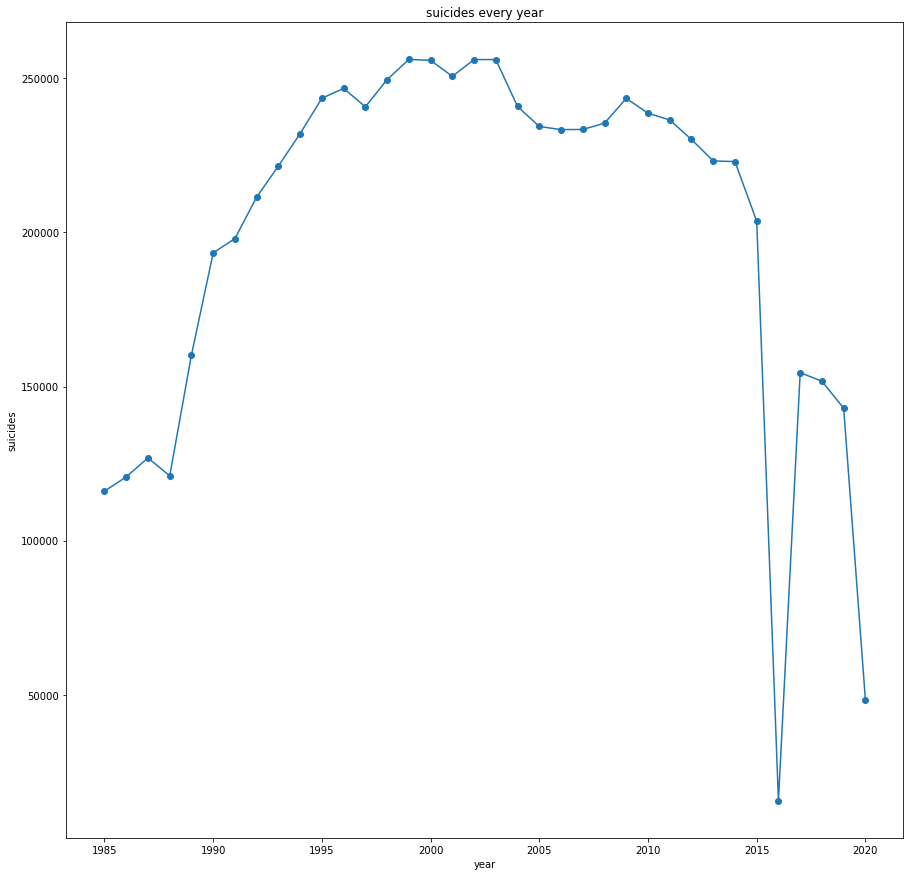

In [115]:
plt.figure(figsize = (15 ,15))
plt.plot(df.groupby('year')['suicides_no'].sum(), '-o')
plt.xlabel('year')
plt.ylabel('suicides')
plt.title('suicides every year');

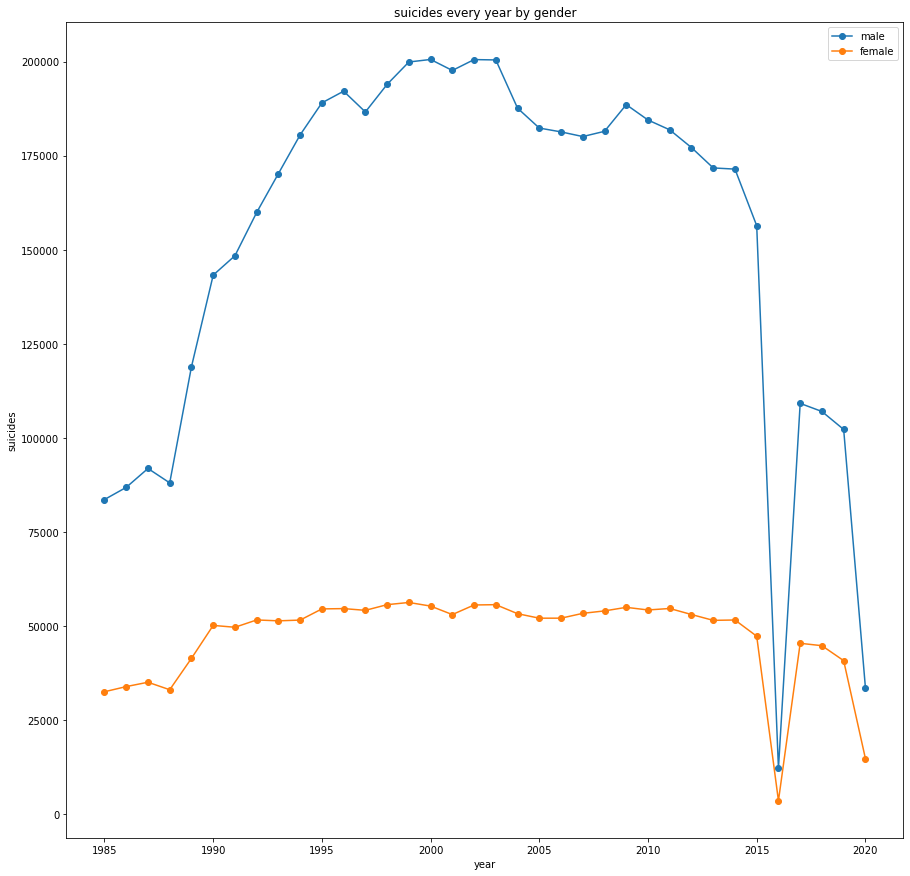

In [116]:
# we can see suicides reached a peak and have reduced since 2000s
plt.figure(figsize = (15 ,15))
plt.plot(df[df['sex'] == 'male'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['sex'] == 'female'].groupby('year')['suicides_no'].sum(),'-o')
plt.legend(['male', 'female'])
plt.xlabel('year')
plt.ylabel('suicides')
plt.title('suicides every year by gender');

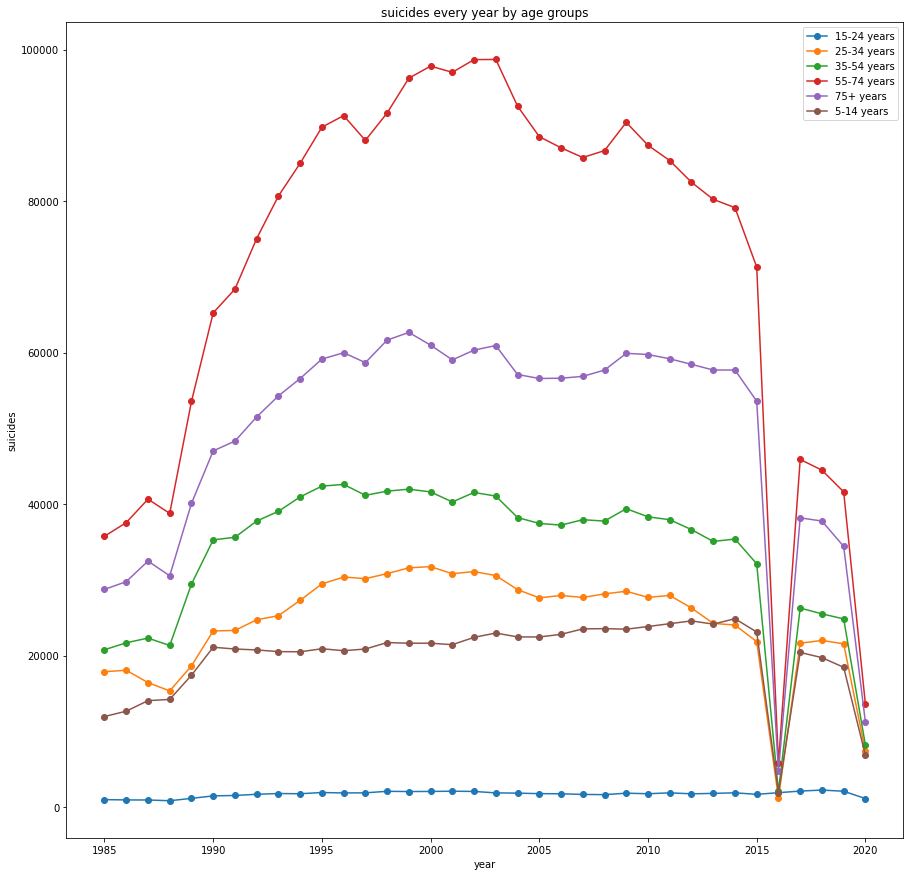

In [117]:
plt.figure(figsize = (15 , 15))
plt.plot(df[df['age'] == '5-14 years'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['age'] == '15-24 years'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['age'] == '25-34 years'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['age'] == '35-54 years'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['age'] == '55-74 years'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['age'] == '75+ years'].groupby('year')['suicides_no'].sum(),'-o')
plt.xlabel('year')
plt.ylabel('suicides')
plt.legend(['15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years', '5-14 years'])
plt.title('suicides every year by age groups');

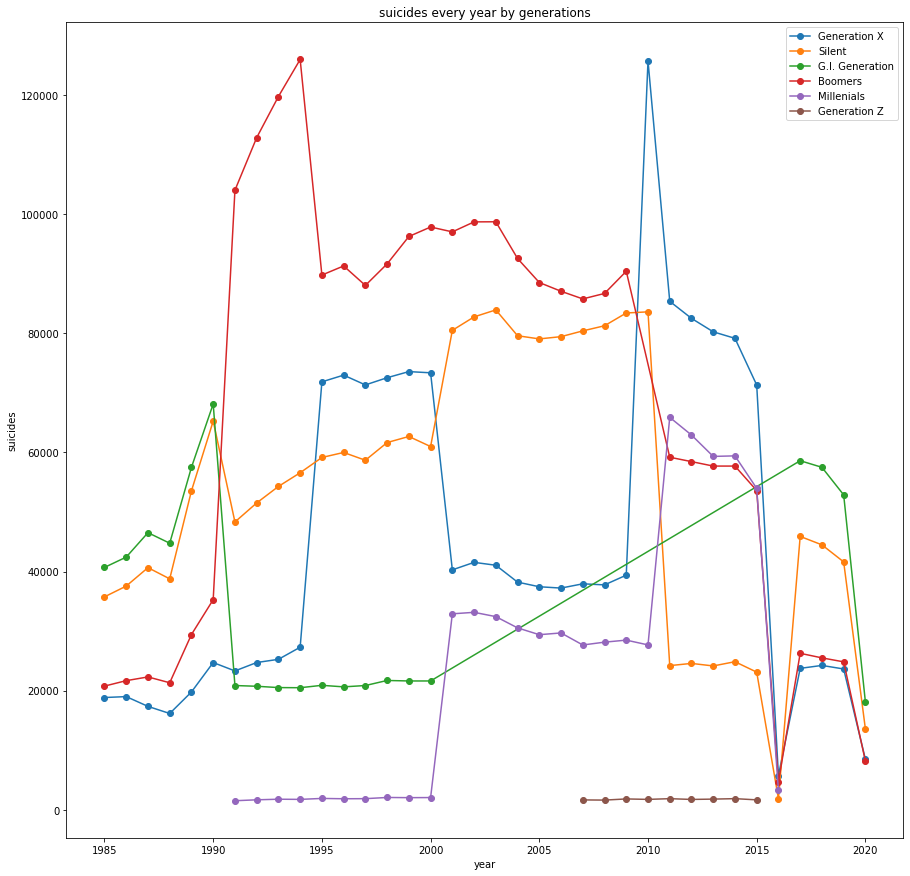

In [118]:
plt.figure(figsize = (15 , 15))
plt.plot(df[df['generation'] == 'Generation X'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['generation'] == 'Silent'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['generation'] == 'G.I. Generation'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['generation'] == 'Boomers'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['generation'] == 'Millenials'].groupby('year')['suicides_no'].sum(),'-o')
plt.plot(df[df['generation'] == 'Generation Z'].groupby('year')['suicides_no'].sum(),'-o')
plt.xlabel('year')
plt.ylabel('suicides')
plt.legend(['Generation X', 'Silent', 'G.I. Generation', 'Boomers','Millenials', 'Generation Z'])
plt.title('suicides every year by generations');

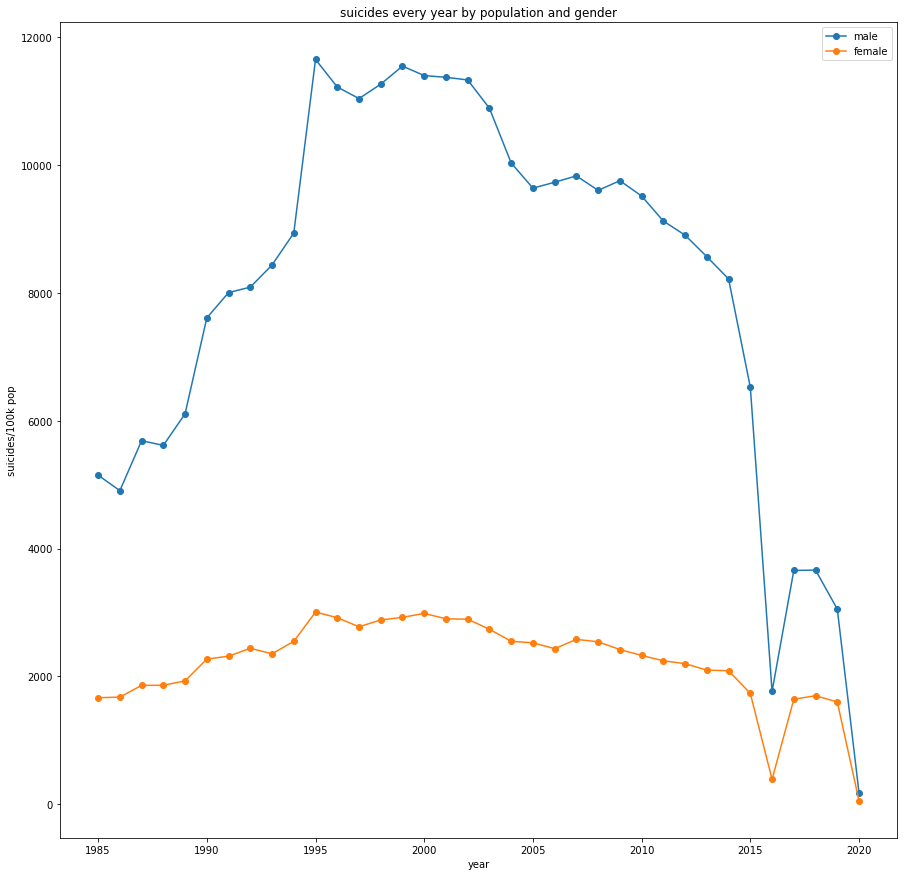

In [119]:
plt.figure(figsize = (15 , 15))
plt.plot(df[df['sex'] == 'male'].groupby('year')['suicides/100k pop'].sum(),'-o')
plt.plot(df[df['sex'] == 'female'].groupby('year')['suicides/100k pop'].sum(),'-o')
plt.legend(['male' , 'female'])
plt.xlabel('year')
plt.ylabel('suicides/100k pop')
plt.title('suicides every year by population and gender');

In [62]:
#females commited much less suicide with respect to their popilation than males

In [120]:
#country year and year represent same information
df = df.drop(columns = ['country-year' , 'country'])

In [121]:
#sucides/100k pop is suicides_no / population * 100k
df = df.drop('suicides/100k pop' , axis = 1)

In [122]:
df['age'] = df['age'].apply(lambda x: re.sub(r"years" , "" , x))

In [124]:
y = df['suicides_no']

In [127]:
X = df.drop('suicides_no' , axis = 1)

In [128]:
X['gdp_for_year ($)'] = X['gdp_for_year ($)'].apply(lambda x: re.sub(r"," , "" , x))
X['gdp_for_year ($)'] = X['gdp_for_year ($)'].astype(float)

In [129]:
#list of categorical and numerical columns
numerical_cols = [col for col in X.columns if X[col].dtype != 'object']
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
print(categorical_cols)
print(numerical_cols)

['sex', 'age', 'generation']
['year', 'population', 'gdp_for_year ($)', 'gdp_per_capita ($)']


In [130]:
#splitting the data
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.75 , random_state = 1)

In [131]:
#ordinally encoding the data on categorical columns
age_categories = ['5-14 ', '15-24 ', '25-34 ', '35-54 ', '55-74 ', '75+ ']
generation_categories = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']
sex_categories = ['male' , 'female']
ordinal = OrdinalEncoder(categories = [sex_categories, age_categories , generation_categories])

In [132]:
#creating pipelines
numerical_preprocessor = Pipeline([
    ('scaler' , StandardScaler())
])
categorical_preprocessor = Pipeline([
    ('ordinal' , ordinal)
])
preprocessor =ColumnTransformer([
    ('numeric' , numerical_preprocessor, numerical_cols),
    ('categoric' , categorical_preprocessor, categorical_cols)
])
pipe = Pipeline([
    ('scaling' , preprocessor),
    ('model' , RandomForestRegressor())
])

In [133]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('scaling',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'population',
                                                   'gdp_for_year ($)',
                                                   'gdp_per_capita ($)']),
                                                 ('categoric',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['male',
                                                                                               'female'],
                                                                                              ['5-14 ',
                                                                         

In [135]:
pipe.score(X_test , y_test)

0.9401472041676939

In [ ]:
#our model has accuracy of 94.01%